# Vintage Analysis

## Imports

In [1]:
from utilities.std_imports import *

## Load data

In [139]:
ds_loans = pd.read_csv('D:/data/csv/loans.csv')
ds_payments = pd.read_csv('D:/data/csv/loan_payments.csv')
ds_payments.head()

,loan_id,date,payment
0,1,1/1/2020,50
1,1,2/1/2020,50
2,1,3/1/2020,50
3,1,4/1/2020,0
4,1,5/1/2020,50


## Build time series

In [140]:
def build_ts(dataset, acc_col, acc_number, index_col, values_col):
    ds_acc = dataset[dataset[acc_col]==acc_number]
    idx = pd.DatetimeIndex(ds_acc[index_col])
    ts = pd.Series(data=list(ds_acc[values_col]), index=idx)
    return ts

date
2020-01-01     50
2020-02-01     50
2020-03-01     50
2020-04-01      0
2020-05-01     50
2020-06-01      0
2020-07-01     50
2020-08-01     50
2020-09-01      0
2020-10-01     50
2020-11-01     50
2020-12-01      0
2021-01-01     50
2021-02-01     50
2021-03-01     50
2021-04-01    100
2021-05-01    100
2021-06-01     50
2021-07-01    100
2021-08-01     50
2021-09-01     50
2021-10-01     50
2021-11-01     50
2021-12-01     50
dtype: int64

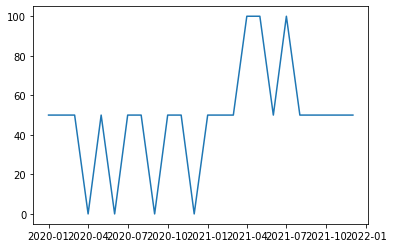

In [141]:
ts = build_ts(ds_payments, 'loan_id', 1, 'date', 'payment')
plt.plot(ts)
ts

## Load time series

In [ ]:
for i in range(1,8):
    ts = build_ts(ds_payments, 'loan_id', i, 'date', 'payment')
    plt.plot(ts)
    plt.show()

## Build vintage matrix

In [ ]:
for i in range(1,8):
    ts = build_ts(ds_payments, 'loan_id', i, 'date', 'payment')
    plt.plot(ts)
    plt.show()

In [162]:
def build_vintage_matrix(ds_payments, account_numbers):
    df_vintage =  pd.DataFrame()

    for i in range(len(account_numbers)):
        ts = build_ts(ds_payments, 'loan_id', account_numbers[i], 'date', 'payment')
        df_vintage[i] = pd.Series(data = list(ts), index = range(ts.shape[0]))

    return df_vintage

In [163]:
account_numbers = list(range(1,8))
df_vintage = build_vintage_matrix(ds_payments, account_numbers)
df_vintage

,0,1,2,3,4,5,6
0,50,150.0,100.0,200.0,50.0,200.0,250.0
1,50,150.0,100.0,200.0,50.0,200.0,250.0
2,50,150.0,100.0,200.0,50.0,200.0,250.0
3,0,50.0,100.0,200.0,0.0,200.0,250.0
4,50,150.0,100.0,200.0,50.0,200.0,250.0
5,0,150.0,0.0,200.0,0.0,200.0,0.0
6,50,0.0,0.0,200.0,50.0,200.0,0.0
7,50,0.0,100.0,200.0,50.0,200.0,50.0
8,0,150.0,100.0,200.0,0.0,0.0,50.0
9,50,0.0,0.0,200.0,50.0,0.0,100.0


## Loss curves

In [160]:
def plot_vintage(df_vintage):
    for i in range(df_vintage.shape[1]):
        plt.plot(df_vintage[i]);
    plt.show()

KeyError: 9

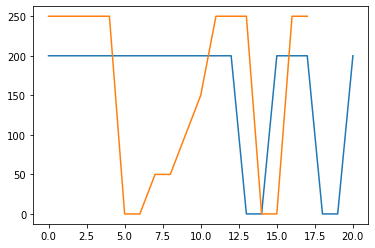

In [179]:
account_numbers = list(range(1,8))
df_vintage = build_vintage_matrix(ds_payments, account_numbers)
plot_vintage(df_vintage)

In [180]:
ds = pd.read_csv('D:/data/csv/vintage.csv')
df_vintage = ds.drop('open_date', axis=1)
df_vintage

,3,6,9,12,15,18,21,24,27,30,33,36
0,0.03,0.09,0.20,0.55,1.10,1.75,2.45,2.60,2.75,2.90,3.1,3.2
1,0.04,0.08,0.26,0.65,1.20,1.90,2.60,2.80,2.95,3.15,NaN,NaN
2,0.05,0.09,0.30,0.62,1.35,1.80,2.50,2.75,NaN,NaN,NaN,NaN
3,0.15,0.15,0.45,0.65,1.50,2.15,NaN,NaN,NaN,NaN,NaN,NaN
4,0.07,0.30,0.65,0.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.00,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
mob = ['3','6','9','12','15','18','21','24','27','30','33','36']
def plot_vintage(df_vintage):
    #for i in range(len(mob)):
        #plt.plot(df_vintage[mob[i]]);
    plt.plot(df_vintage[mob[0]]);
    plt.show()

In [200]:
mob = [3,6,9,12,15,18,21,24,27,30,33,36]
df_vintage['3']
#plt.plot(df_vintage['3']);
plot_vintage(df_vintage)

KeyError: 3

## Links

https://www.listendata.com/2019/09/credit-risk-vintage-analysis.html